LoL lestvica
=========================================

Analiziral bom najboljših 3000 igralcev videogrice League of Legends na vzhodnoevropskem serverju glede na Soloqueue.
Podatke bom poiskal na strani https://www.leagueofgraphs.com/rankings/summoners/eune

Za vsakega igralca bom pogledal:
 - ime igralca
 - uvrstitev na lestvici, in njegove točke (po teh smo tudi igralci razvrščeni) ter točkam pripadajoč rang
 - število zmag in splošen winrate
 - rang, število zmag in winrate v Flexqueue.

S podatki se bom spraševal:
 - ali je (bolj) pomembna povezava med številom iger in doseženimi točkami
   oziroma ali je bolj pomembna povezava med winrate-om in točkami
 - ali obstaja povezava med uspešnostjo v Soloqueue-ju in Flexqueue-ju
   oziroma ali je igralcem sploh do tega da igrajo oba queue-ja
   
 
 


Kaj sploh je League of Legends (LoL) in kako sistem razvrsti igralce?

LoL je videoigra, igrana 5 na 5. Za potrebe te naloge so pomembni naslednji podatki:
1. Igralci se merijo v dveh različnih kategorijah - v Soloqueueju in FlexQueueju. Kot že imeni predlagata
prvega igraš sam (torej dobiš še štiri druge igralce, ki igrajo sami v ekipo in igraš proti petim drugim, ki so ravno tako vsak sam),
v drugem pa lahko igraš sam, v dvoje, troje, ali kot 5 na 5, po celih ekipah skupaj.

*Neuradno je Soloqueue veliko bolj reprezentativna kategorija sposobnosti nekega igralca, zato bom tudi po tej kategoriji
razvrščal igralce.*

2. Sistem rangiranja igralce razvrsti v kategorije Iron, Bronze, Silver, Gold, Platinum, Diamond, Master, Grandmaster, Challenger.
Vsak od teh rankov je potem razdeljen še na divizije od 1-4, kjer je 1 boljše od 4 (torej Gold 1 je boljše od Gold 3).
V nalogi bom gledal le igralce v najvišjih rankih, torej od Master do Challenger.

3. Na odigrano igro vsak igralec v zmagovalni ekipi dobi približno 20 točk, vsak izmed poražencev pa jih toliko zgubi. 

 *Master, Grandmaster in Challenger so v bistvu ena sama velika kategorija, kjer igralci tekmujejo neposredno en z drugim;
 od tega je prvih 200 po točkah v Challengerju, naslednjih 500 v Grandmasterju, ostali pa so v Masterju.*
 
 *V nižjih rankih (od Irona do Diamonda) pa za vsako naslednjo divizjo potrebuješ 100 točk in si avtomatsko naprej (torej da 
 prideš iz Gold 2 v Gold 1 potrebuješ 100 točk in potem si v Gold 1 na 0 točk, iz Platinum 1 ravno tako potrebuješ 100 točk in 
 potem si Diamond 4 na 0 točk...).*

Uvoz podatkov
===================
Začnimo z uvozom podatkov.


In [24]:

import pandas
import matplotlib.pyplot as plt
import os.path

pandas.options.display.max_rows = 20

summoners = pandas.read_csv('tabelica.csv')
summoners["games"] = (summoners["wins"] * (100/summoners["winrate"])).round().astype("int32")


summoners


,summoner,rank,lp,wins,winrate,rankFlex,winsFlex,winrateFlex,games
0,PolskiKoz,Challenger,1769,352,58.1,Master,95.0,63.3,606
1,WindbreakerXD,Challenger,1688,290,58.4,Diamond,120.0,67.4,497
2,hi im Nekro,Challenger,1524,256,60.0,NaN,NaN,NaN,427
3,Litny,Challenger,1520,262,57.2,NaN,NaN,NaN,458
4,berryrasp,Challenger,1498,491,53.8,Challenger,310.0,62.6,913
...,...,...,...,...,...,...,...,...,...
2995,Dobbry las tf tf,Master,1,205,55.3,Diamond,144.0,52.4,371
2996,Macjei,Master,1,204,53.3,Master,135.0,53.8,383
2997,Cortana Bot,Master,1,204,57.3,Platinum,31.0,53.4,356
2998,Unicornik,Master,1,203,52.1,Diamond,105.0,50.7,390


V League of Legends (LoL-u) se igralec imenuje "Summoner", točke so "League points" oziroma lp, za ostale stolpce so pa njihova imena že precej reprezentativna.
Stolpci rank, lp, wins, winrate predstavljajo Soloqueue, "games" v zadnjem stolpcu pripadajo prav tako Soloqueue. Končnica -Flex pa je za Flexqueue. 

Kot omenjeno v Read me-ju je v Challengerju prvih 200 igralcev, naslednjih 500 je v GrandMasterju, ostali so pa v Masterju. Lahko se v to hitro prepričamo.

In [44]:
sums_po_ranku.count()["summoner"]

rank
Challenger      200
GrandMaster     500
Master         2300
Name: summoner, dtype: int64

Začetna hipoteza pred analizo podatkov je, da je položaj na lestvici, torej lp, bolj odvisen od winrate-a, kot od števila zmag oziroma iger.
Hipoteza prihaja iz izkušenj iz prve roke. Seveda pa sta podatka odvisna drug od drugega. V nekem trenutku je namreč zelo pomembno, koliko iger imaš odigranih; 
npr. kljub 100% winrate-u z dvajsetimi odigranimi igrami ne moreš imeti zadosti točk, da si v visokem rank-u. V našem primeru analiziramo le igralce z veliko igrami in so potemtakem naši rezultati reprezentativni. 

Vredno je omeniti še, da v ozadju rankiranja igralcev deluje MMR (matchmaking rating) sistem. V našem primeru je zadosti, če se zavedamo, da bojo zaradi tega faktorja na višja mesta (do višjih točk) lažje prišli že dokazano dobri igralci. To pomeni, če je nek igralec že dlje časa v Challengerju, potem bo sistem poskrbel, da bo tja (nazaj) igralec hitreje prišel, če kdaj izpade.

Analiza igralcev (Soloqueue)
===============================

Začnimo s številom iger.

In [46]:
sums_po_ranku.wins.mean()

rank
Challenger     274.315000
GrandMaster    293.716000
Master         286.459565
Name: wins, dtype: float64

In [47]:
sums_po_ranku.wins.median()

rank
Challenger     242.0
GrandMaster    249.5
Master         246.5
Name: wins, dtype: float64

Povprečno število iger in mediana nam pokažeta, da je za visok rank potrebno nekaj manj kot 300 iger. Vidimo, da summonerji v Challengerju odigrajo poveprečno manj iger kot njihovi nasprotniki v nižjih rank-ih. Sklepamo, da je temu tako, zaradi dveh faktorjev: MMR sistem poskrbi, da ti igralci hitro dosežejo vrh, po drugi strani pa lahko sumimo, da imajo zelo visok winrate.

In [48]:
sums_po_ranku = summoners.groupby("rank")
sums_po_ranku.winrate.mean()

rank
Challenger     55.600000
GrandMaster    54.286200
Master         53.403435
Name: winrate, dtype: float64

In [49]:
sums_po_ranku.winrate.median()

rank
Challenger     54.8
GrandMaster    53.3
Master         52.7
Name: winrate, dtype: float64

Ob upoštevanju, da je povprečen wirate vseh igralcev v celi igrici zelo blizu 50%, lahko sklepamo, da ima tistih nekaj pri vrhu winrate izjemno visok.
Kljub temu pa čisto po pričakovanjih winrate iz višjega proti nižjemu ranku pada. To tudi potrdi naš prejšnji sum, da je za manjše število iger v Challengerju deloma kriv tudi visok winrate.

Poglejmo sedaj, v kakšni korelaciji s točkami sta winrate in število iger.

In [50]:
summoners["lp"].corr(summoners["winrate"])

0.2057666323108484

Korelacijski koeficient je relativno majhen. To pomeni, da je korelacija šibka, a statistično vseeno signifikantna. Vsepovsod po lestvici so torej ljudje z visokim winrate-om, a jih je v povprečju pri vrhu več. 

In [51]:
summoners["lp"].corr(summoners["wins"])

-0.016951040667759935

Sicer je korelacijski koeficient med številom iger (zmag) in točkami negativen, vendar je izjemno blizu 0, zato sklepamo, da skoraj ni povezave med številom iger in točkami.

Zdi se nam, da naša hipoteza o večji pomembnosti winrate-a kot pa številom iger drži.

Zanimivo bi bilo pogledati še, v kaki povezavi sta winrate in število iger po posameznih rankih.

Analiza po rankih
---

In [52]:
challenger["lp"].corr(challenger["winrate"])

0.21310014106563238

In [53]:
gmaster = summoners[summoners["rank"] == "GrandMaster"]
gmaster["lp"].corr(gmaster["winrate"])

0.15520628044795445

In [54]:
master = summoners[summoners["rank"] == "Master"]
master["lp"].corr(master["winrate"])

0.05343529951065668

Zanimivo je v Challengerju veliko večja povezava med winrate-om in točkami kot v Masterju. Po premisleku je to tudi logično, saj v Masterju igralci v povprečju odigrajo več iger.

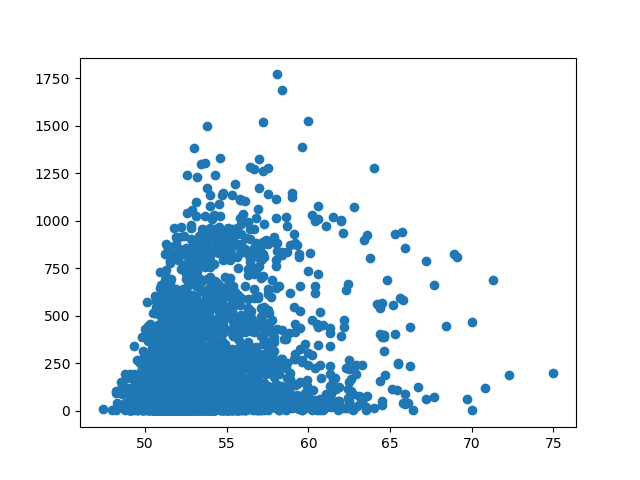

In [55]:
x = summoners["winrate"]
y = summoners["lp"]

plt.scatter(x,y)
plt.show()


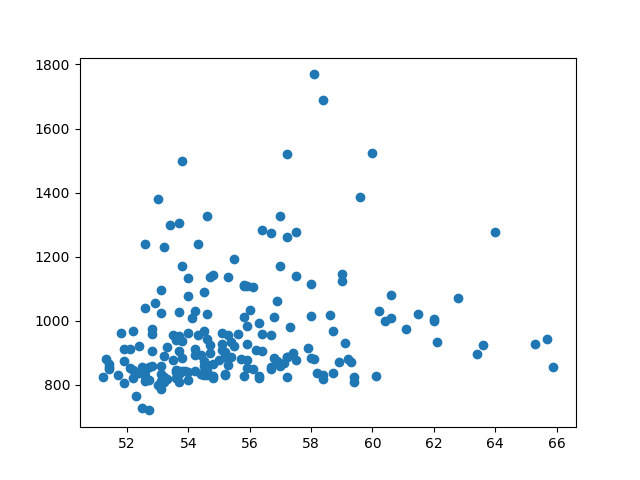

In [56]:
challenger = summoners[summoners["rank"] == "Challenger"]
x = challenger["winrate"]
y = challenger["lp"]

plt.scatter(x,y)
plt.show()

Iz grafa se vidi, kako ima velika večina igralcev winrate med 50% - 55% in manj kot 500 točk. Prav tako je očitno, da ima zelo malo igralcev visok winrate, in tisti, ki ga imajo, so odigrali manj iger, obratno, da si med najbolšimi moraš imeti odigranih veliko iger in visok winrate.

V duhu grafa izračunajmo korelacijo med odigranimi igrami in winrate-om.

In [57]:
summoners["games"].corr(summoners["winrate"])

-0.4762417319386062

V tem primeru je korelacijski koeficient absolutno velik in negativen. To nas ne preseneča zares, saj je z malo igrami veliko lažje imeti visok winrate.
Po drugi strani to pomeni, da tisti, ki potrebujejo veliko iger, da pridejo v visok rank, so slabši od tistih, ki tja pridejo z malo igrami.

In [58]:
challenger["games"].corr(challenger["winrate"])

-0.639042826818203

In [59]:
gmaster["games"].corr(gmaster["winrate"])

-0.5614848160508412

In [60]:
master["games"].corr(master["winrate"])

-0.45466788915786643

Višje ko gremo, bolj je ta povezava očitna.

FlexQueue
==============================

To je druga vrsta rankiranja igralcev. Sistem je popolnoma enak, vendar v realnosti igralci to vrsto večino igrajo bolj za zabavo. Poglejmo, ali je temu res tako.

In [65]:
flex1 = summoners[summoners["winsFlex"] >= 10]
flex1["gamesFlex"] = (flex["winsFlex"] * (100/flex["winrateFlex"].astype("float"))).round().astype("int32")
flex1

<ipython-input-65-820856701b53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flex1["gamesFlex"] = (flex["winsFlex"] * (100/flex["winrateFlex"].astype("float"))).round().astype("int32")


,summoner,rank,lp,wins,winrate,rankFlex,winsFlex,winrateFlex,games,gamesFlex
0,PolskiKoz,Challenger,1769,352,58.1,Master,95.0,63.3,606,150.0
1,WindbreakerXD,Challenger,1688,290,58.4,Diamond,120.0,67.4,497,178.0
4,berryrasp,Challenger,1498,491,53.8,Challenger,310.0,62.6,913,495.0
5,tall and hot,Challenger,1387,137,59.6,Diamond,26.0,56.5,230,NaN
7,naizduP 997,Challenger,1328,311,54.6,Diamond,28.0,75.7,570,NaN
...,...,...,...,...,...,...,...,...,...,...
2995,Dobbry las tf tf,Master,1,205,55.3,Diamond,144.0,52.4,371,275.0
2996,Macjei,Master,1,204,53.3,Master,135.0,53.8,383,251.0
2997,Cortana Bot,Master,1,204,57.3,Platinum,31.0,53.4,356,NaN
2998,Unicornik,Master,1,203,52.1,Diamond,105.0,50.7,390,207.0


Da sploh dobiš Flex rank, moraš odigrati vsaj 10 iger v tem queue-ju. Kot vidimo dobra šestina igralcev ni odigrala niti 10 iger Flex queue-ja, medtem ko so vsi igralci v povprečju odigrali okrog 280 iger Solo queue-ja. Že to nam da slutiti, da summonerjem resnično ni do Flexa. Če pogledamo recimo nek signifikanten delež iger v primerjavi s Solo queue-jem, dobimo naslednje:

In [62]:
flex = summoners[summoners["winsFlex"] >= 50]
flex["gamesFlex"] = (flex["winsFlex"] * (100/flex["winrateFlex"].astype("float"))).round().astype("int32")
flex

<ipython-input-62-261b00b6b1af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flex["gamesFlex"] = (flex["winsFlex"] * (100/flex["winrateFlex"].astype("float"))).round().astype("int32")


,summoner,rank,lp,wins,winrate,rankFlex,winsFlex,winrateFlex,games,gamesFlex
0,PolskiKoz,Challenger,1769,352,58.1,Master,95.0,63.3,606,150
1,WindbreakerXD,Challenger,1688,290,58.4,Diamond,120.0,67.4,497,178
4,berryrasp,Challenger,1498,491,53.8,Challenger,310.0,62.6,913,495
9,I am Sobek,Challenger,1304,409,53.7,Challenger,288.0,63.6,762,453
11,Coatpustmain,Challenger,1283,244,56.4,Platinum,61.0,60.4,433,101
...,...,...,...,...,...,...,...,...,...,...
2990,Tom Kranich,Master,1,209,51.1,Platinum,74.0,56.5,409,131
2991,ZACrazy,Master,1,208,55.0,Master,222.0,56.6,378,392
2995,Dobbry las tf tf,Master,1,205,55.3,Diamond,144.0,52.4,371,275
2996,Macjei,Master,1,204,53.3,Master,135.0,53.8,383,251


Vidimo, da je približno le polovico igralcev odigralo 50 iger Flexa.

In [66]:
sumGames = 0
sumFlex = 0
#se da lepse
summonersWithMoreSolo = 0
summonersWithMoreFlex = 0
for summoner in flex.values:
    games = summoner[8]
    gamesFlex = summoner[9] 
    sumGames += games
    sumFlex += gamesFlex
    
    if games > gamesFlex:
        summonersWithMoreSolo += 1
    else:
        summonersWithMoreFlex += 1
    #i += summoner["gamesFlex"]
print(sumGames, sumFlex)
print(summonersWithMoreSolo, summonersWithMoreFlex)
#lahko bi s statistiko dobil verjetnost da bo nek summoner imel vec solo gamov

888814 383278
1336 196


V splošnem so res igralci bolj odločeni igrati Solo kot Flex. Če opazujemo le igralce, ki so odigrali vsaj nekaj (50) iger flexa, vidimo, da je summonerjev z več Solo igrami veliko kot več kot obratno.

In [67]:
flex["winrate"].corr(flex["winrateFlex"])


0.17924086583399548

Kljub temu, imamo pa od teh približno 10% ljudi, ki so odločeni igrati Flex. Ti ga igrajo veliko več kot Solo.
Še vedno pa je skoraj polovica igralcev odigralo le malo več kot zadostno število iger za rank v Flex-u.

Zaključek
=====================


Po pričakovanjih hipoteza o večji povezavi med točkami in winrate-om kot med točkami in številom iger v Solo queue-ju drži. V tem primeru statistika ne laže, v smislu, da zares predstavlja in modelira, kako zgleda rankiranje igralcev v LoL-u.

In [ ]:
Prav tako hiter vpogled v Flex queue pokaže, da je za igralce te video igre veliko bolj pomembna razvrstitev v Solo queue-ju. Flex se namreč igra večino 